In [ ]:
!pip install -q qiskit==0.16.1

In [2]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

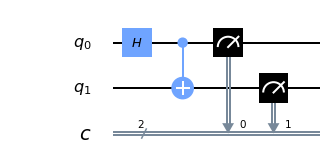

In [3]:
circ_bell = QuantumCircuit(2, 2)
circ_bell.h(0)
circ_bell.cx(0, 1)
circ_bell.measure(range(2), range(2))

circ_bell.draw(output='mpl')

In [4]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ_bell, backend, shots=1000)
counts = job.result().get_counts()
print(counts)

{'00': 485, '11': 515}


In [5]:
circ_bell2 = QuantumCircuit(2)
circ_bell2.h(0)
circ_bell2.cx(0, 1)

backend = Aer.get_backend('statevector_simulator')
job = execute(circ_bell2, backend)

state = job.result().get_statevector()

for i in range(4):
  s = format(i, "b")
  s = (2*len(s))*"0" + s
  print("Amplitude of", s, "=", state[i])

print()

for i in range(4):
  s = format(i, "b")
  s = (2*len(s))*"0" + s
  print("Probability of", s, "=", abs(state[i])**2)

Amplitude of 000 = (0.7071067811865476+0j)
Amplitude of 001 = 0j
Amplitude of 000010 = 0j
Amplitude of 000011 = (0.7071067811865475+0j)

Probability of 000 = 0.5000000000000001
Probability of 001 = 0.0
Probability of 000010 = 0.0
Probability of 000011 = 0.4999999999999999


In [7]:
IBMQ.save_account(os.environ['IBMQ_TOKEN'])

In [8]:
provider = IBMQ.load_account()
backend_overview()

/usr/local/lib/python3.6/dist-packages/qiskit/providers/models/backendconfiguration.py:366: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '
/usr/local/lib/python3.6/dist-packages/qiskit/providers/models/backendconfiguration.py:377: UserWarning: `rep_time` now has units of seconds(s) rather than microseconds(mu s).
  warnings.warn('`rep_time` now has units of seconds(s) rather '


ibmq_santiago                ibmq_athens                  ibmq_armonk
-------------                -----------                  -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  1
Pending Jobs: 2              Pending Jobs: 20             Pending Jobs: 11
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      128.3          Avg. T1:      71.6           Avg. T1:      179.9
Avg. T2:      118.4          Avg. T2:      100.6          Avg. T2:      205.2



ibmq_valencia                ibmq_ourense                 ibmq_vigo
-------------                ------------                 ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 1              Pending Jobs: 0              Pending Jobs: 644
Least busy:   False          Least busy:   True           Least busy:   False
Operational:  True           Oper

In [11]:
backend_monitor(provider.backends.ibmq_ourense)

ibmq_ourense
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 0
    backend_version: 1.3.4
    basis_gates: ['id', 'u1', 'u2', 'u3', 'cx']
    local: False
    simulator: False
    memory: True
    allow_object_storage: True
    max_experiments: 75
    n_registers: 1
    default_rep_delay: 250
    sample_name: Giraffe
    allow_q_object: True
    conditional: False
    open_pulse: False
    coupling_map: [[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]
    url: None
    backend_name: ibmq_ourense
    max_shots: 8192
    dtm: 0.2222222222222222
    meas_map: [[0, 1, 2, 3, 4]]
    description: 5 qubit device Ourense
    supported_instructions: ['cx', 'id', 'delay', 'measure', 'reset', 'rz', 'sx', 'u1', 'u2', 'u3', 'x']
    rep_delay_range: [0, 500]
    dt: 0.2222222222222222
    quantum_volume: 8
    online_date: 2019-07-03T04:00:00+00:00
    multi_meas_enabled: False
    dynamic_reprate_enabled: True
    credits_r

UnboundLocalError: ignored

The error above is related to: https://github.com/Qiskit/qiskit-ibmq-provider/issues/844

In [13]:
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(operational=True, simulator=False, status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits > 1))
print("We are executing on backend", backend)
print("It has", backend.status().pending_jobs, "pending jobs")
job_exp = execute(circ_bell, backend=backend)
job_monitor(job_exp)

We are executing on backend ibmqx2
It has 0 pending jobs
Job Status: job has successfully run


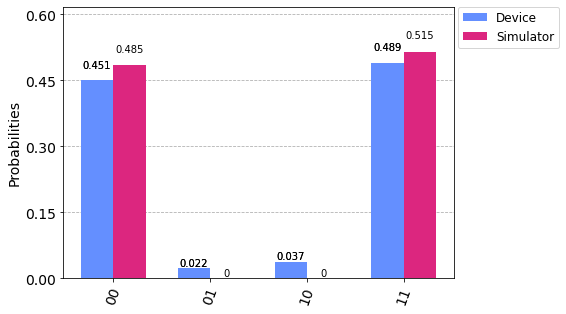

In [15]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ_bell)
plot_histogram([counts_exp, counts], legend=['Device', 'Simulator'])